In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Advanced EDA for the COVID-19 Virus

Welcome to the second part of the ANALYSE section of the COVID-19 project. In this code-along session, you will get the opportunity to:

* Explore how to get the daily differences for the cumulative cases.
* Calculate the daily growth rate per country.
* Compare South Africa's growth since case one against other countries.
* Plot a logarithmic graph of the cumulative cases.

This section will be a more interactive and code-along compared to the first one. 

Enjoy and wash your hands!

In [2]:
#import local cases
confirmed_results = pd.read_csv('https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_confirmed.csv')
#import global cases
global_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

## Daily differences in the cumulative cases in South Africa

In this section, we will investigate how to figure out the daily growth/change in the number of cases. Firstly, lets complete the cumulative cases graph we did last week.

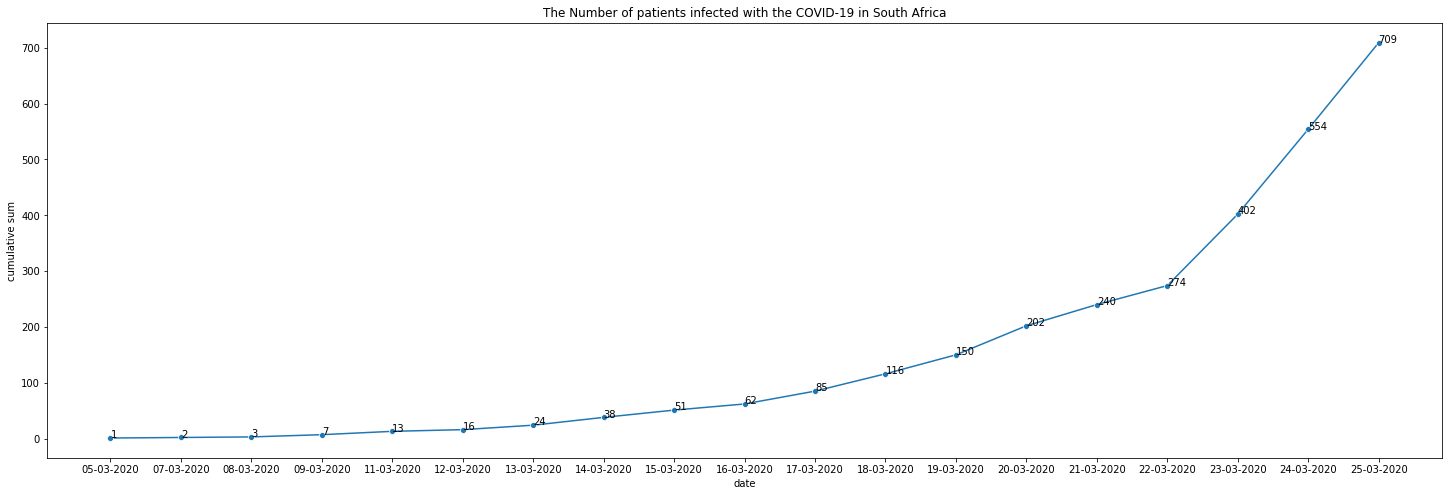

In [3]:
cumulative_cases = confirmed_results[['date', 'country']].groupby('date').count().cumsum().reset_index().rename(columns={'country':'cumulative sum'}) #create cumulative dataframe

plt.figure(figsize=(25,8)) #Set figure size
plt.title('The Number of patients infected with the COVID-19 in South Africa')


ax = sns.lineplot(data=cumulative_cases, x='date', y='cumulative sum', 
                  marker='o', 
                  dashes=False)

for i in cumulative_cases.groupby('date'):
    #i[1] is a grouped data frame; looping through each data row in the cumulative dataframe
    for x,y,m in i[1][['date','cumulative sum','cumulative sum']].values:  # x = x value; y = y_value ; m = marker value
        ax.text(x,y,f'{m:.0f}') #ax.text will 

plt.show()

Next, we will do our calculted metric! Our function should return the daily difference for each date recorded. Example:

Daily Difference from 12-03-2020 to 13-03-2020 : 8 <br>
Daily Difference from 09-03-2020 to 11-03-2020 : 6

Those differences would then have to be appended to our original dataframe.

In [4]:
confirmed_results

,case_id,date,YYYYMMDD,country,province,geo_subdivision,age,gender,transmission_type,type
0,1,05-03-2020,20200305,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,travel
1,2,07-03-2020,20200307,South Africa,GP,ZA-GP,39.0,female,Travelled to Italy,travel
2,3,08-03-2020,20200308,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,travel
3,4,09-03-2020,20200309,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,travel
4,5,09-03-2020,20200309,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,travel
...,...,...,...,...,...,...,...,...,...,...
704,705,25-03-2020,20200325,South Africa,FS,ZA-FS,NaN,not specified,NaN,pending
705,706,25-03-2020,20200325,South Africa,FS,ZA-FS,NaN,not specified,NaN,pending
706,707,25-03-2020,20200325,South Africa,FS,ZA-FS,NaN,not specified,NaN,pending
707,708,25-03-2020,20200325,South Africa,FS,ZA-FS,NaN,not specified,NaN,pending


In [5]:
cum_sum = confirmed_results[['date', 'country']].groupby('date').count().cumsum().reset_index().rename(columns={'country':'cumulative sum'})

In [6]:
cum_sum = confirmed_results[['date', 'country']].groupby('date').count().cumsum().reset_index().rename(columns={'country':'cumulative sum'})

cum_sum['daily difference'] = cum_sum['cumulative sum'].diff().fillna(0).astype(np.int)

In [7]:
cum_sum

,date,cumulative sum,daily difference
0,05-03-2020,1,0
1,07-03-2020,2,1
2,08-03-2020,3,1
3,09-03-2020,7,4
4,11-03-2020,13,6
5,12-03-2020,16,3
6,13-03-2020,24,8
7,14-03-2020,38,14
8,15-03-2020,51,13
9,16-03-2020,62,11


In [8]:
pd.merge(confirmed_results, cum_sum, on='date')

,case_id,date,YYYYMMDD,country,province,geo_subdivision,age,gender,transmission_type,type,cumulative sum,daily difference
0,1,05-03-2020,20200305,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,travel,1,0
1,2,07-03-2020,20200307,South Africa,GP,ZA-GP,39.0,female,Travelled to Italy,travel,2,1
2,3,08-03-2020,20200308,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,travel,3,1
3,4,09-03-2020,20200309,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,travel,7,4
4,5,09-03-2020,20200309,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,travel,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...
704,705,25-03-2020,20200325,South Africa,FS,ZA-FS,NaN,not specified,NaN,pending,709,155
705,706,25-03-2020,20200325,South Africa,FS,ZA-FS,NaN,not specified,NaN,pending,709,155
706,707,25-03-2020,20200325,South Africa,FS,ZA-FS,NaN,not specified,NaN,pending,709,155
707,708,25-03-2020,20200325,South Africa,FS,ZA-FS,NaN,not specified,NaN,pending,709,155


# Daily growth for each country

Let's apply this code to get the daily change for each country

In [9]:
pd.set_option("display.max_columns", 400)

glob_df = global_confirmed.drop(columns=['Lat', 'Long'])
glob_df.groupby(by='Country/Region').sum().T

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Diamond Princess,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,MS Zaandam,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [10]:
def daily_diff(df, country):

    df = df.groupby(by='Country/Region').sum().T #group countries by regions/states then transpose the dataframe so that dates are rows and not columns
    df = df.reset_index().rename(columns={'index':'Date'}).rename_axis(None, axis=1) #reset your index so date is converted to a column; then rename the index to None

    df = df[['Date', country]] #select your country
    df['Date'] = pd.to_datetime(df['Date']) #change date to datetime

    df['daily difference'] = df[country].diff().fillna(0).astype(np.int) #calculate the differences for each day
    df.rename(columns={country : 'cumulative cases'}, inplace=True)

    return df

In [30]:
daily_diff(glob_df, 'South Africa')


,Date,cumulative cases,daily difference
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,0,0
3,2020-01-25,0,0
4,2020-01-26,0,0
...,...,...,...
77,2020-04-08,1845,96
78,2020-04-09,1934,89
79,2020-04-10,2003,69
80,2020-04-11,2028,25


Let's see how South Africa's daily growth looks:

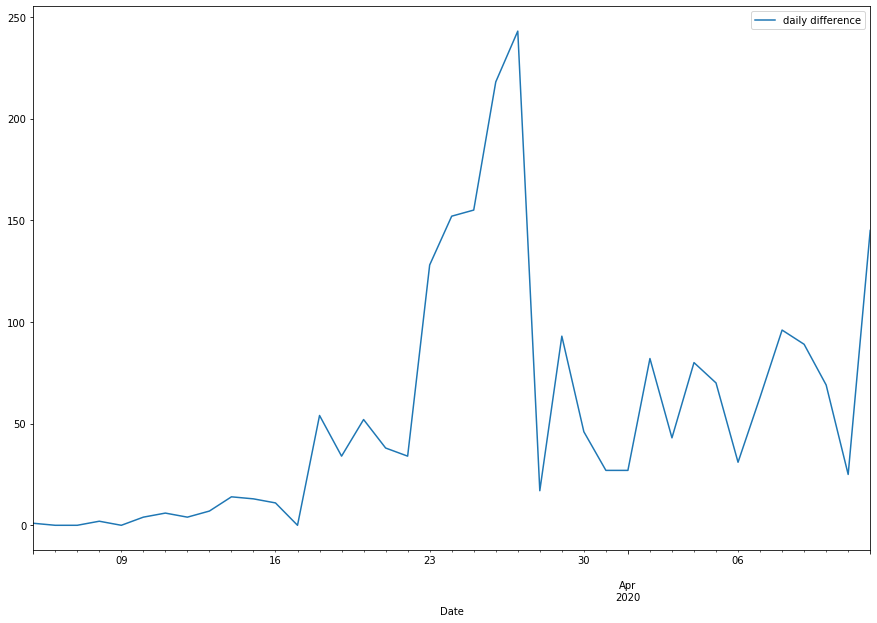

In [12]:
df_sa = daily_diff(glob_df, 'South Africa')

df_sa[df_sa['cumulative cases'] > 0].plot(x='Date', y='daily difference', figsize=(15,10))

In [13]:
china = daily_diff(glob_df, 'China')
italy = daily_diff(glob_df, 'Italy')
usa = daily_diff(glob_df, 'US')
s_korea = daily_diff(glob_df, 'Korea, South')
sa = daily_diff(glob_df, 'South Africa')

## Comparing South Africa's COVID-19 growth vs other countries

For this example, we will use the countries:

* South Africa
* South Korea
* USA
* Italy
* China

We will be plotting the dataframes produced by the function, ```daily_diff```, we created previously pn the same axis. Pandas has a built in plotting function.

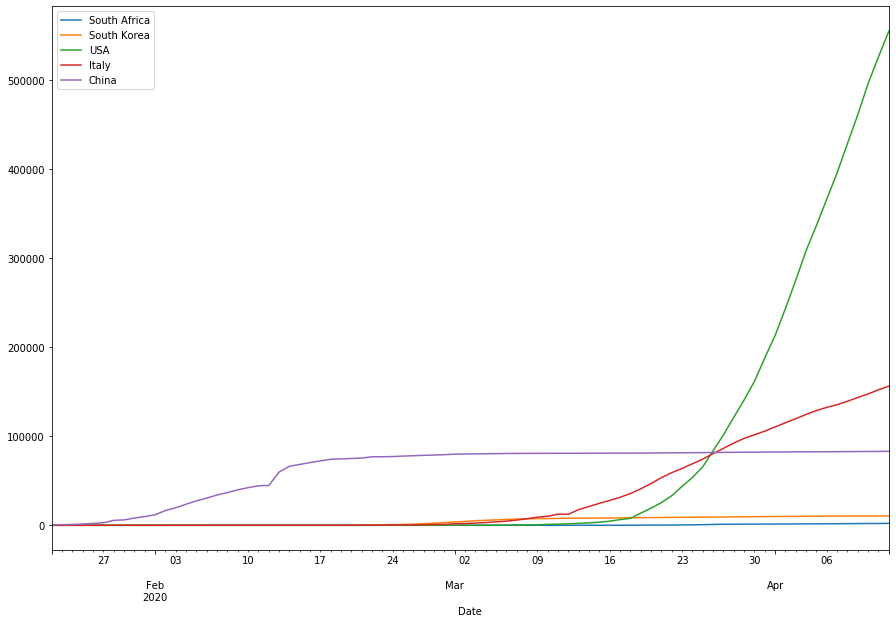

In [14]:
ax = sa.plot(x='Date', y='cumulative cases' , label='South Africa', figsize=(15,10))
s_korea.plot(x='Date', y='cumulative cases' , label='South Korea', ax=ax)
usa.plot(x='Date', y='cumulative cases' , label='USA', ax=ax)
italy.plot(x='Date', y='cumulative cases' , label='Italy', ax=ax)
china.plot(x='Date', y='cumulative cases' , label='China', ax=ax)


### Not the greatest graph to compare! 

From this graph, we can't tell how South Africa is doing against, let's say, Italy. This is because the cases have a very large difference in number (1462 cases in South Africa versus 115242 cases in Italy) <br>

<br>

In this situation, **logging** your graph will help give a better comparison. Have a look below:

C:\Users\kopan\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


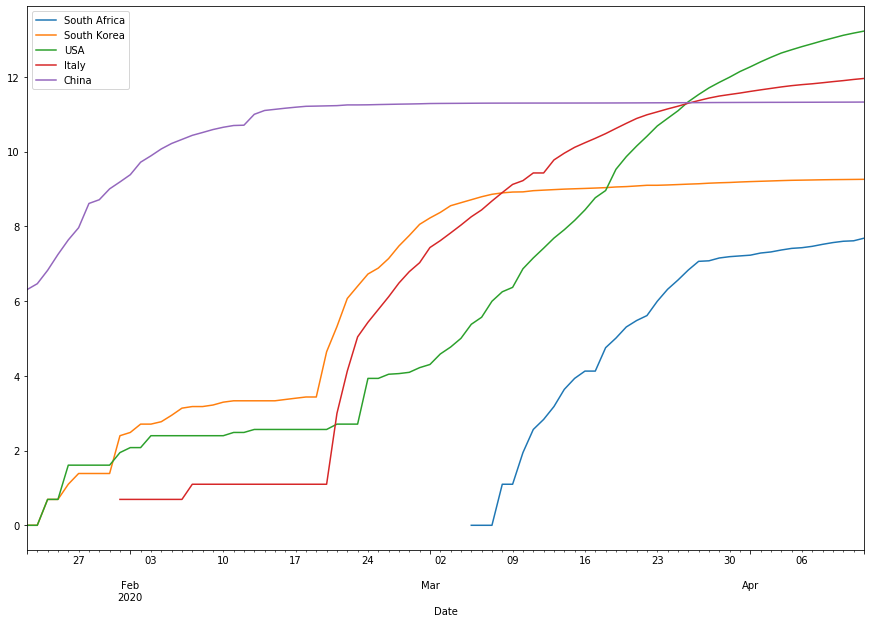

In [15]:
sa['log'] = np.log(sa['cumulative cases'])
s_korea['log'] = np.log(s_korea['cumulative cases'])
usa['log'] = np.log(usa['cumulative cases'])
italy['log'] = np.log(italy['cumulative cases'])
china['log'] = np.log(china['cumulative cases'])

ax = sa.plot(x='Date', y='log' , label='South Africa', figsize=(15,10))
s_korea.plot(x='Date', y='log' , label='South Korea', ax=ax)
usa.plot(x='Date', y='log' , label='USA', ax=ax)
italy.plot(x='Date', y='log' , label='Italy', ax=ax)
china.plot(x='Date', y='log' , label='China', ax=ax)

From this graph, we can get a better insight into the patterns of each country and how they compare to each other. <br>
<br>
Looking at the graph:

1. South Korea has indeed "flattened their curve" to some extent
2. The USA has not dealt with the spread well and this could be due to a particular carrot top in setting the policy of emergencies.
3. South Africa has already seen a slight decrease in the growth of the virus. 